<a href="https://colab.research.google.com/github/MittalNeha/Extensive_Vision_AI6/blob/main/week5/Session_5_Bhaskar_arch_exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*italicized text*# Session 5
##  Training MNIST (Final Model)



Top Testing Accuracy (loss) : % ()

In [13]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [14]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

## Model Architecture
12->24->36->MP->12->12->24->MP-> 12 -> 12 -> 24 ->GAP->Dense->10

##Download the dataset


In [15]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values. 
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])

In [16]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Processing...
Done!


In [17]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:64: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


[Train]
 - Numpy Shape: (60000, 28, 28)
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(-0.4242)
 - max: tensor(2.8215)
 - mean: tensor(-0.0001)
 - std: tensor(1.0000)
 - var: tensor(1.0001)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([128, 1, 28, 28])
torch.Size([128])


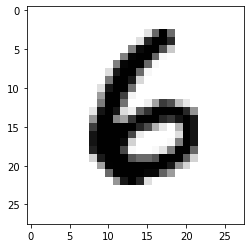

In [18]:
# We'd need to convert it into Numpy! Remember above we have converted it into tensors already
train_data = train.train_data
train_data = train.transform(train_data.numpy())

print('[Train]')
print(' - Numpy Shape:', train.train_data.cpu().numpy().shape)
print(' - Tensor Shape:', train.train_data.size())
print(' - min:', torch.min(train_data))
print(' - max:', torch.max(train_data))
print(' - mean:', torch.mean(train_data))
print(' - std:', torch.std(train_data))
print(' - var:', torch.var(train_data))

dataiter = iter(train_loader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')


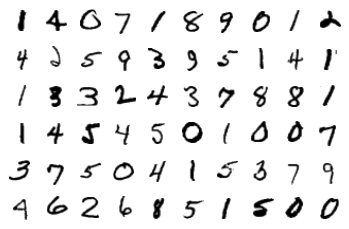

In [19]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [20]:
# simple transform
simple_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                      #  transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values. 
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])
exp = datasets.MNIST('./data', train=True, download=True, transform=simple_transforms)
exp_data = exp.train_data
exp_data = exp.transform(exp_data.numpy())

print('[Train]')
print(' - Numpy Shape:', exp.train_data.cpu().numpy().shape)
print(' - Tensor Shape:', exp.train_data.size())
print(' - min:', torch.min(exp_data))
print(' - max:', torch.max(exp_data))
print(' - mean:', torch.mean(exp_data))
print(' - std:', torch.std(exp_data))
print(' - var:', torch.var(exp_data))

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:64: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


[Train]
 - Numpy Shape: (60000, 28, 28)
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(0.)
 - max: tensor(1.)
 - mean: tensor(0.1307)
 - std: tensor(0.3081)
 - var: tensor(0.0949)


In [21]:
class Net(nn.Module):
  #original
    def __init__(self):
        #our var declaration
        super(Net, self).__init__()                     #Input - Output - RF
        self.conv1 = nn.Conv2d(1, 16, 3)                #28 - 26 - 3x3
        self.conv2 = nn.Conv2d(16, 32, 3)               #26 - 24 - 5x5
        self.conv2_1 = nn.Conv2d(32, 16, 1)             #24 - 24 - 5x5
        self.pool1 = nn.MaxPool2d(2, 2)                 #24 - 12 - 10x10
        self.conv3 = nn.Conv2d(16, 16, 3)              #12 - 10 - 12x12
        self.conv4 = nn.Conv2d(16, 32, 3)              #10 - 8 - 14x14
        self.conv4_1 = nn.Conv2d(32, 16, 1)           #8 - 8 - 14x14
        #self.pool2 = nn.MaxPool2d(2, 2)                 #8 -  4 - 28x28
        self.conv5 = nn.Conv2d(16, 16, 3)             #8  -  6 - 16x16
        #self.conv6 = nn.Conv2d(36, 48, 3)            #5 -   3 - 32x32
        #self.conv7 = nn.Conv2d(48, 10, 3)             #3 -   1 - 34x34
        self.gap = nn.AvgPool2d(kernel_size=6)
        self.fc1 = nn.Linear(16, 10)
        

    def forward(self, x):
        #self is containing all variables, compulsory to pass
        #x is input image
        x = self.pool1((F.relu(self.conv2_1(F.relu(self.conv2(F.relu(self.conv1(x))))))))   #conv1 -> ReLU -> conv2 -> ReLU -> max pool
        x = (F.relu(self.conv4_1(F.relu(self.conv4(F.relu(self.conv3(x)))))))   #conv3 -> ReLU -> conv4 -> ReLU -> max pool
        #x = F.relu(self.conv6(F.relu(self.conv5(x))))               #conv5 -> ReLU -> conv6 -> ReLU
        x = F.relu(self.conv5(x))
        #print(x.shape)
        x = self.gap(x)
        #print(x.shape)
        x = x.view(-1, 1*1*16)
        x = self.fc1(x)
        #print(x.shape)
        #x = F.relu(self.conv7(x))                                  #Dont need to perform ReLU on last layer as its output would be subject to softmax, cannot apply non-linearity twice.
        #x = (self.conv7(x))                                         #conv7 -> output
        x = x.view(-1, 10)
        return F.log_softmax(x)       #log of softmax

model = Net().to(device)

In [22]:
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             160
            Conv2d-2           [-1, 32, 24, 24]           4,640
            Conv2d-3           [-1, 16, 24, 24]             528
         MaxPool2d-4           [-1, 16, 12, 12]               0
            Conv2d-5           [-1, 16, 10, 10]           2,320
            Conv2d-6             [-1, 32, 8, 8]           4,640
            Conv2d-7             [-1, 16, 8, 8]             528
            Conv2d-8             [-1, 16, 6, 6]           2,320
         AvgPool2d-9             [-1, 16, 1, 1]               0
           Linear-10                   [-1, 10]             170
Total params: 15,306
Trainable params: 15,306
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.35
Params size (MB): 0.06
Estimated Tot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


In [23]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []

def train(model, device, train_loader, optimizer, epoch):
  model.train()
  pbar = tqdm(train_loader)
  correct = 0
  processed = 0
  for batch_idx, (data, target) in enumerate(pbar):
    # get samples
    data, target = data.to(device), target.to(device)

    # Init
    optimizer.zero_grad()
    # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes. 
    # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.

    # Predict
    y_pred = model(data)

    # Calculate loss
    loss = F.nll_loss(y_pred, target)
    train_losses.append(loss)

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Update pbar-tqdm
    
    pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
    processed += len(data)

    pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
    train_acc.append(100*correct/processed)

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    test_acc.append(100. * correct / len(test_loader.dataset))

In [24]:
model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

  0%|          | 0/469 [00:00<?, ?it/s]

EPOCH: 0


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
Loss=2.3018712997436523 Batch_id=468 Accuracy=11.02: 100%|██████████| 469/469 [00:11<00:00, 42.00it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3010, Accuracy: 1135/10000 (11.35%)

EPOCH: 1


Loss=2.2891244888305664 Batch_id=468 Accuracy=11.24: 100%|██████████| 469/469 [00:11<00:00, 42.05it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3008, Accuracy: 1135/10000 (11.35%)

EPOCH: 2


Loss=2.245305299758911 Batch_id=468 Accuracy=11.26: 100%|██████████| 469/469 [00:11<00:00, 42.00it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.2753, Accuracy: 1227/10000 (12.27%)

EPOCH: 3


Loss=0.6981410980224609 Batch_id=468 Accuracy=52.27: 100%|██████████| 469/469 [00:11<00:00, 41.85it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.5881, Accuracy: 8150/10000 (81.50%)

EPOCH: 4


Loss=0.26766708493232727 Batch_id=468 Accuracy=86.39: 100%|██████████| 469/469 [00:11<00:00, 41.95it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.4459, Accuracy: 8567/10000 (85.67%)

EPOCH: 5


Loss=0.07809921354055405 Batch_id=468 Accuracy=92.51: 100%|██████████| 469/469 [00:11<00:00, 42.30it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1646, Accuracy: 9461/10000 (94.61%)

EPOCH: 6


Loss=0.1616327315568924 Batch_id=468 Accuracy=95.30: 100%|██████████| 469/469 [00:11<00:00, 42.17it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1238, Accuracy: 9615/10000 (96.15%)

EPOCH: 7


Loss=0.05283813551068306 Batch_id=468 Accuracy=96.21: 100%|██████████| 469/469 [00:11<00:00, 42.07it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0857, Accuracy: 9739/10000 (97.39%)

EPOCH: 8


Loss=0.04579995572566986 Batch_id=468 Accuracy=97.06: 100%|██████████| 469/469 [00:11<00:00, 42.18it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0855, Accuracy: 9723/10000 (97.23%)

EPOCH: 9


Loss=0.10073956102132797 Batch_id=468 Accuracy=97.42: 100%|██████████| 469/469 [00:11<00:00, 42.56it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0723, Accuracy: 9783/10000 (97.83%)

EPOCH: 10


Loss=0.05339400842785835 Batch_id=468 Accuracy=97.75: 100%|██████████| 469/469 [00:11<00:00, 42.30it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0779, Accuracy: 9764/10000 (97.64%)

EPOCH: 11


Loss=0.07206251472234726 Batch_id=468 Accuracy=97.95: 100%|██████████| 469/469 [00:11<00:00, 42.34it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0559, Accuracy: 9819/10000 (98.19%)

EPOCH: 12


Loss=0.042679134756326675 Batch_id=468 Accuracy=98.19: 100%|██████████| 469/469 [00:10<00:00, 42.64it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0648, Accuracy: 9799/10000 (97.99%)

EPOCH: 13


Loss=0.040995728224515915 Batch_id=468 Accuracy=98.34: 100%|██████████| 469/469 [00:10<00:00, 42.88it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0578, Accuracy: 9823/10000 (98.23%)

EPOCH: 14


Loss=0.11930491775274277 Batch_id=468 Accuracy=98.37: 100%|██████████| 469/469 [00:10<00:00, 42.71it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0532, Accuracy: 9827/10000 (98.27%)

EPOCH: 15


Loss=0.022240759804844856 Batch_id=468 Accuracy=98.53: 100%|██████████| 469/469 [00:11<00:00, 42.37it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0461, Accuracy: 9845/10000 (98.45%)

EPOCH: 16


Loss=0.043265845626592636 Batch_id=468 Accuracy=98.58: 100%|██████████| 469/469 [00:11<00:00, 41.27it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0476, Accuracy: 9848/10000 (98.48%)

EPOCH: 17


Loss=0.017553580924868584 Batch_id=468 Accuracy=98.69: 100%|██████████| 469/469 [00:10<00:00, 42.65it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0427, Accuracy: 9868/10000 (98.68%)

EPOCH: 18


Loss=0.05055871978402138 Batch_id=468 Accuracy=98.77: 100%|██████████| 469/469 [00:10<00:00, 43.73it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0385, Accuracy: 9883/10000 (98.83%)

EPOCH: 19


Loss=0.01606729067862034 Batch_id=468 Accuracy=98.80: 100%|██████████| 469/469 [00:10<00:00, 43.32it/s]



Test set: Average loss: 0.0537, Accuracy: 9834/10000 (98.34%)



Text(0.5, 1.0, 'Test Accuracy')

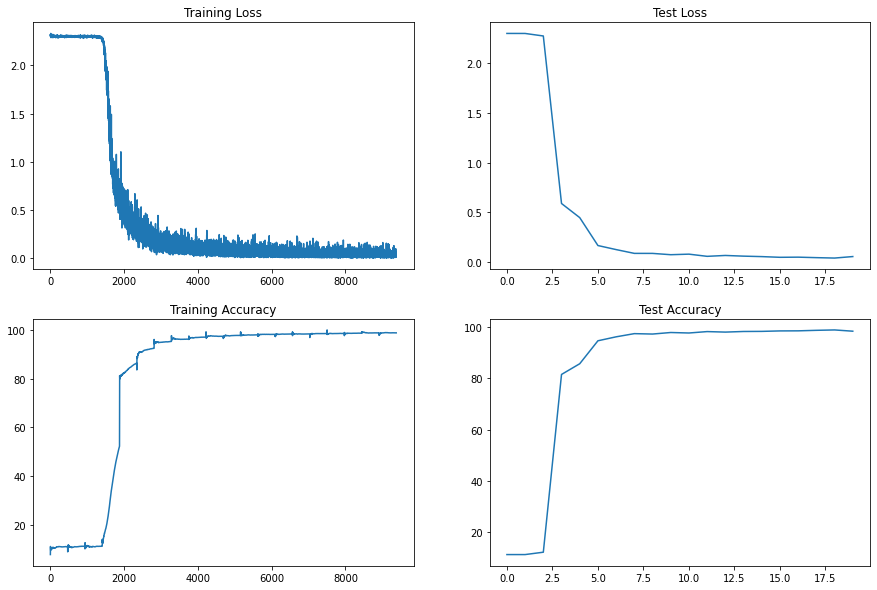

In [25]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

In [35]:
class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        # Input Block
        self.convblock1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU()
        ) # output_size = 26

        # CONVOLUTION BLOCK 1
        self.convblock2 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU()
        ) # output_size = 24

        # TRANSITION BLOCK 1
        self.pool1 = nn.MaxPool2d(2, 2) # output_size = 11
        self.convblock4 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=16, kernel_size=(1, 1), padding=0, bias=False),
            nn.ReLU()
        ) # output_size = 11

        # CONVOLUTION BLOCK 2
        self.convblock5 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU()
        ) # output_size = 9
        self.convblock6 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU()
        ) # output_size = 7

        # 
        self.convblock7 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=16, kernel_size=(1, 1), padding=0, bias=False),
            nn.ReLU()
        ) # output_size = 7

        # OUTPUT BLOCK
        self.convblock8 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU()
        ) # output_size = 7

        self.gap = nn.Sequential(
            nn.AvgPool2d(kernel_size=6)
        ) # output_size = 1

        self.fc1 = nn.Linear(16, 10)

    def forward(self, x):
        x = self.convblock1(x)
        x = self.convblock2(x)
        #x = self.convblock3(x)
        x = self.pool1(x)
        x = self.convblock4(x)
        x = self.convblock5(x)
        x = self.convblock6(x)
        x = self.convblock7(x)
        x = self.convblock8(x)
        x = self.gap(x)
        x = x.view(-1, x.shape[1]*x.shape[2]*x.shape[3])
        x = self.fc1(x)
        x = x.view(-1, 10)
        return F.log_softmax(x, dim=-1)

model = Net2().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             144
              ReLU-2           [-1, 16, 26, 26]               0
            Conv2d-3           [-1, 32, 24, 24]           4,608
              ReLU-4           [-1, 32, 24, 24]               0
         MaxPool2d-5           [-1, 32, 12, 12]               0
            Conv2d-6           [-1, 16, 12, 12]             512
              ReLU-7           [-1, 16, 12, 12]               0
            Conv2d-8           [-1, 16, 10, 10]           2,304
              ReLU-9           [-1, 16, 10, 10]               0
           Conv2d-10             [-1, 32, 8, 8]           4,608
             ReLU-11             [-1, 32, 8, 8]               0
           Conv2d-12             [-1, 16, 8, 8]             512
             ReLU-13             [-1, 16, 8, 8]               0
           Conv2d-14             [-1, 1

In [36]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

  0%|          | 0/469 [00:00<?, ?it/s]

EPOCH: 0


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Loss=2.3108694553375244 Batch_id=468 Accuracy=10.98: 100%|██████████| 469/469 [00:10<00:00, 42.98it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3010, Accuracy: 1135/10000 (11.35%)

EPOCH: 1


Loss=2.2905571460723877 Batch_id=468 Accuracy=12.05: 100%|██████████| 469/469 [00:10<00:00, 44.24it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.2904, Accuracy: 1687/10000 (16.87%)

EPOCH: 2


Loss=0.3488004505634308 Batch_id=468 Accuracy=58.16: 100%|██████████| 469/469 [00:10<00:00, 42.86it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2921, Accuracy: 9152/10000 (91.52%)

EPOCH: 3


Loss=0.17177803814411163 Batch_id=468 Accuracy=92.09: 100%|██████████| 469/469 [00:10<00:00, 43.84it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2195, Accuracy: 9351/10000 (93.51%)

EPOCH: 4


Loss=0.19878269731998444 Batch_id=468 Accuracy=94.58: 100%|██████████| 469/469 [00:10<00:00, 44.02it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1249, Accuracy: 9643/10000 (96.43%)

EPOCH: 5


Loss=0.17316757142543793 Batch_id=468 Accuracy=95.84: 100%|██████████| 469/469 [00:10<00:00, 43.71it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1083, Accuracy: 9665/10000 (96.65%)

EPOCH: 6


Loss=0.04118311032652855 Batch_id=468 Accuracy=96.26: 100%|██████████| 469/469 [00:10<00:00, 43.82it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0844, Accuracy: 9733/10000 (97.33%)

EPOCH: 7


Loss=0.14092592895030975 Batch_id=468 Accuracy=96.95: 100%|██████████| 469/469 [00:10<00:00, 42.77it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0735, Accuracy: 9769/10000 (97.69%)

EPOCH: 8


Loss=0.008391591720283031 Batch_id=468 Accuracy=97.28: 100%|██████████| 469/469 [00:10<00:00, 43.51it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0697, Accuracy: 9772/10000 (97.72%)

EPOCH: 9


Loss=0.0884205773472786 Batch_id=468 Accuracy=97.56: 100%|██████████| 469/469 [00:10<00:00, 43.47it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0913, Accuracy: 9709/10000 (97.09%)

EPOCH: 10


Loss=0.10826200246810913 Batch_id=468 Accuracy=97.76: 100%|██████████| 469/469 [00:10<00:00, 42.98it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0790, Accuracy: 9765/10000 (97.65%)

EPOCH: 11


Loss=0.0640873983502388 Batch_id=468 Accuracy=97.91: 100%|██████████| 469/469 [00:10<00:00, 42.76it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0703, Accuracy: 9772/10000 (97.72%)

EPOCH: 12


Loss=0.05431995913386345 Batch_id=468 Accuracy=98.08: 100%|██████████| 469/469 [00:10<00:00, 42.89it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0579, Accuracy: 9821/10000 (98.21%)

EPOCH: 13


Loss=0.12864495813846588 Batch_id=468 Accuracy=98.22: 100%|██████████| 469/469 [00:11<00:00, 42.56it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0580, Accuracy: 9816/10000 (98.16%)

EPOCH: 14


Loss=0.09515135735273361 Batch_id=468 Accuracy=98.32: 100%|██████████| 469/469 [00:10<00:00, 43.08it/s]



Test set: Average loss: 0.0570, Accuracy: 9827/10000 (98.27%)



Text(0.5, 1.0, 'Test Accuracy')

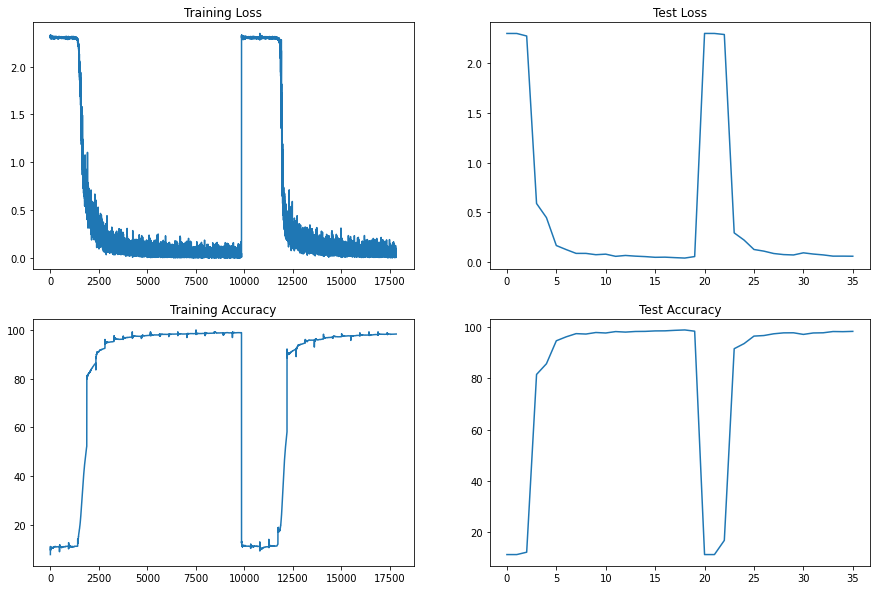

In [37]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

In [47]:
dropout_value = 0.1
class Net3_1(nn.Module):
    def __init__(self):
        super(Net3_1, self).__init__()
        # Input Block
        self.convblock1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=14, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(14),
            nn.Dropout(dropout_value)
        ) # output_size = 26

        # CONVOLUTION BLOCK 1
        self.convblock2 = nn.Sequential(
            nn.Conv2d(in_channels=14, out_channels=20, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(20),
            nn.Dropout(dropout_value)
        ) # output_size = 24

        # TRANSITION BLOCK 1
        self.pool1 = nn.MaxPool2d(2, 2) # output_size = 11
        self.convblock4 = nn.Sequential(
            nn.Conv2d(in_channels=20, out_channels=12, kernel_size=(1, 1), padding=0, bias=False),
            nn.ReLU()
        ) # output_size = 11

        # CONVOLUTION BLOCK 2
        self.convblock5 = nn.Sequential(
            nn.Conv2d(in_channels=12, out_channels=12, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(12),
            nn.Dropout(dropout_value)
        ) # output_size = 9
        self.convblock6 = nn.Sequential(
            nn.Conv2d(in_channels=12, out_channels=20, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(20),
            nn.Dropout(dropout_value)
        ) # output_size = 7

        # 
        self.convblock7 = nn.Sequential(
            nn.Conv2d(in_channels=20, out_channels=12, kernel_size=(1, 1), padding=0, bias=False),
            nn.ReLU()
        ) # output_size = 7

        # OUTPUT BLOCK
        self.convblock8 = nn.Sequential(
            nn.Conv2d(in_channels=12, out_channels=16, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Dropout(dropout_value)
        ) # output_size = 7

        self.gap = nn.Sequential(
            nn.AvgPool2d(kernel_size=6)
        ) # output_size = 1

        self.fc1 = nn.Linear(16, 10)

    def forward(self, x):
        x = self.convblock1(x)
        x = self.convblock2(x)
        #x = self.convblock3(x)
        x = self.pool1(x)
        x = self.convblock4(x)
        x = self.convblock5(x)
        x = self.convblock6(x)
        x = self.convblock7(x)
        x = self.convblock8(x)
        x = self.gap(x)
        x = x.view(-1, x.shape[1]*x.shape[2]*x.shape[3])
        x = self.fc1(x)
        x = x.view(-1, 10)
        return F.log_softmax(x, dim=-1)

model = Net3_1().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 14, 26, 26]             126
              ReLU-2           [-1, 14, 26, 26]               0
       BatchNorm2d-3           [-1, 14, 26, 26]              28
           Dropout-4           [-1, 14, 26, 26]               0
            Conv2d-5           [-1, 20, 24, 24]           2,520
              ReLU-6           [-1, 20, 24, 24]               0
       BatchNorm2d-7           [-1, 20, 24, 24]              40
           Dropout-8           [-1, 20, 24, 24]               0
         MaxPool2d-9           [-1, 20, 12, 12]               0
           Conv2d-10           [-1, 12, 12, 12]             240
             ReLU-11           [-1, 12, 12, 12]               0
           Conv2d-12           [-1, 12, 10, 10]           1,296
             ReLU-13           [-1, 12, 10, 10]               0
      BatchNorm2d-14           [-1, 12,

In [48]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

  0%|          | 0/469 [00:00<?, ?it/s]

EPOCH: 0


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Loss=0.0803135558962822 Batch_id=468 Accuracy=86.81: 100%|██████████| 469/469 [00:10<00:00, 44.67it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1346, Accuracy: 9650/10000 (96.50%)

EPOCH: 1


Loss=0.09775355458259583 Batch_id=468 Accuracy=97.38: 100%|██████████| 469/469 [00:10<00:00, 43.06it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0854, Accuracy: 9749/10000 (97.49%)

EPOCH: 2


Loss=0.03824330493807793 Batch_id=468 Accuracy=97.90: 100%|██████████| 469/469 [00:10<00:00, 44.06it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0526, Accuracy: 9843/10000 (98.43%)

EPOCH: 3


Loss=0.09781771153211594 Batch_id=468 Accuracy=98.21: 100%|██████████| 469/469 [00:10<00:00, 43.75it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0470, Accuracy: 9841/10000 (98.41%)

EPOCH: 4


Loss=0.0221172496676445 Batch_id=468 Accuracy=98.34: 100%|██████████| 469/469 [00:10<00:00, 44.22it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0433, Accuracy: 9858/10000 (98.58%)

EPOCH: 5


Loss=0.027490893378853798 Batch_id=468 Accuracy=98.57: 100%|██████████| 469/469 [00:10<00:00, 44.14it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0352, Accuracy: 9883/10000 (98.83%)

EPOCH: 6


Loss=0.0742013230919838 Batch_id=468 Accuracy=98.67: 100%|██████████| 469/469 [00:10<00:00, 43.79it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0309, Accuracy: 9903/10000 (99.03%)

EPOCH: 7


Loss=0.016374656930565834 Batch_id=468 Accuracy=98.73: 100%|██████████| 469/469 [00:10<00:00, 44.34it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0347, Accuracy: 9885/10000 (98.85%)

EPOCH: 8


Loss=0.04122784361243248 Batch_id=468 Accuracy=98.74: 100%|██████████| 469/469 [00:10<00:00, 44.12it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0309, Accuracy: 9900/10000 (99.00%)

EPOCH: 9


Loss=0.026202475652098656 Batch_id=468 Accuracy=98.83: 100%|██████████| 469/469 [00:10<00:00, 42.96it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0399, Accuracy: 9880/10000 (98.80%)

EPOCH: 10


Loss=0.03911016508936882 Batch_id=468 Accuracy=98.82: 100%|██████████| 469/469 [00:10<00:00, 44.25it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0326, Accuracy: 9890/10000 (98.90%)

EPOCH: 11


Loss=0.044032711535692215 Batch_id=468 Accuracy=98.95: 100%|██████████| 469/469 [00:10<00:00, 44.07it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0428, Accuracy: 9862/10000 (98.62%)

EPOCH: 12


Loss=0.05117316544055939 Batch_id=468 Accuracy=98.98: 100%|██████████| 469/469 [00:10<00:00, 43.80it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0335, Accuracy: 9900/10000 (99.00%)

EPOCH: 13


Loss=0.010487941093742847 Batch_id=468 Accuracy=99.00: 100%|██████████| 469/469 [00:10<00:00, 45.45it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0300, Accuracy: 9897/10000 (98.97%)

EPOCH: 14


Loss=0.026825353503227234 Batch_id=468 Accuracy=99.05: 100%|██████████| 469/469 [00:10<00:00, 43.13it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0233, Accuracy: 9918/10000 (99.18%)

EPOCH: 15


Loss=0.029494082555174828 Batch_id=468 Accuracy=99.05: 100%|██████████| 469/469 [00:10<00:00, 43.04it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0247, Accuracy: 9925/10000 (99.25%)

EPOCH: 16


Loss=0.007191142532974482 Batch_id=468 Accuracy=99.12: 100%|██████████| 469/469 [00:10<00:00, 43.60it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0238, Accuracy: 9926/10000 (99.26%)

EPOCH: 17


Loss=0.0020589677151292562 Batch_id=468 Accuracy=99.12: 100%|██████████| 469/469 [00:10<00:00, 43.65it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0229, Accuracy: 9915/10000 (99.15%)

EPOCH: 18


Loss=0.005620793905109167 Batch_id=468 Accuracy=99.08: 100%|██████████| 469/469 [00:10<00:00, 43.82it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0218, Accuracy: 9928/10000 (99.28%)

EPOCH: 19


Loss=0.01654144376516342 Batch_id=468 Accuracy=99.16: 100%|██████████| 469/469 [00:10<00:00, 43.72it/s]



Test set: Average loss: 0.0260, Accuracy: 9916/10000 (99.16%)



Text(0.5, 1.0, 'Test Accuracy')

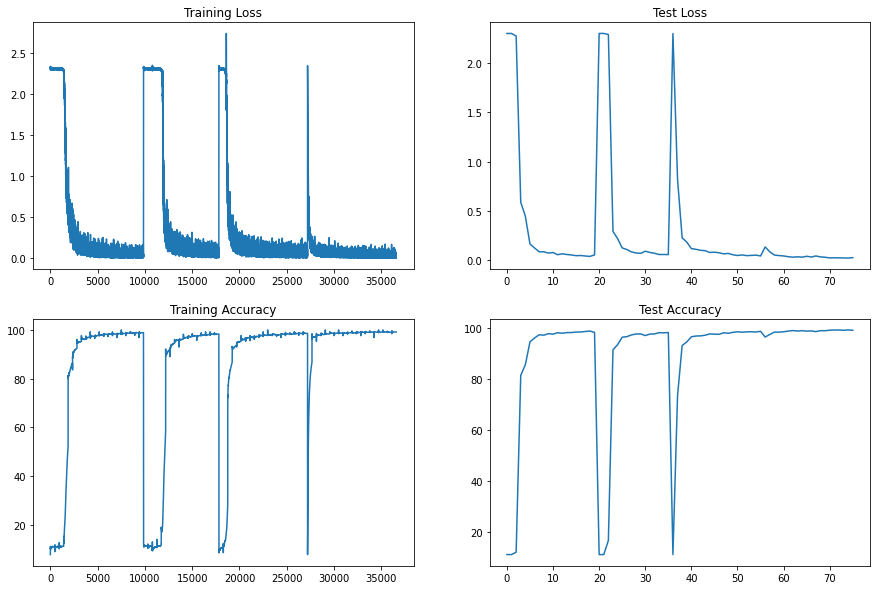

In [50]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")